<a href="https://colab.research.google.com/github/dioz95/CIFAR-10-with-TensorFlow2.0/blob/main/TF2_0_CIFAR_improved_withDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# import libraries
import tensorflow as tf
print(f'Tensorflow version : {tf.__version__}')

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Flatten, Conv2D, BatchNormalization, Dense, Dropout, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model

Tensorflow version : 2.4.0


In [7]:
# Load data
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f'X shape : {X_train.shape}')
print(f'y shape : {y_train.shape}')

X shape : (50000, 32, 32, 3)
y shape : (50000,)


In [8]:
# Check number of classes
K = len(set(y_train))
print(f'Number of classes : {K}')

Number of classes : 10


In [9]:
# Create model using functional API
i = Input(shape=X_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

# Convolutional Layers {Conv --> BatchNorm --> Conv --> BatchNorm --> MaxPooling (3x)}
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
# x = Dropout(0.2)(x)
# x = GlobalMaxPooling2D()(x)

# Neural Networks Layer
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

# Create model
model = Model(i,x)

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Data Augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 29s 18ms/step - loss: 1.8046 - accuracy: 0.4178 - val_loss: 1.1759 - val_accuracy: 0.5855
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.0234 - accuracy: 0.6429 - val_loss: 0.8392 - val_accuracy: 0.7102
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8638 - accuracy: 0.7023 - val_loss: 0.8255 - val_accuracy: 0.7168
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7583 - accuracy: 0.7417 - val_loss: 0.8130 - val_accuracy: 0.7394
Epoch 5/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.6873 - accuracy: 0.7658 - val_loss: 0.7778 - val_accuracy: 0.7420
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6378 - accuracy: 0.7819 - val_loss: 0.6633 - val_accuracy: 0.7881
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5943 - accuracy: 0.7976 - val_loss: 0.7206 -

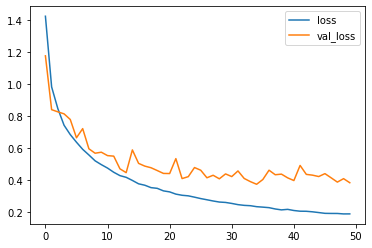

In [11]:
# Plot loss history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

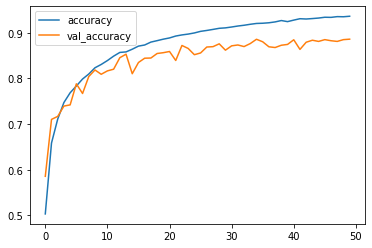

In [12]:
# Plot accuracy history
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[913   7  25   8   7   3   3   4  16  14]
 [  9 952   2   2   0   0   3   1   6  25]
 [ 21   0 862  23  29  17  24  12   5   7]
 [ 13   4  35 769  26  68  48  26   3   8]
 [  7   1  31  20 889  13  15  21   1   2]
 [  6   0  37 103  24 793  13  22   0   2]
 [  6   0  34  23   8   7 916   0   2   4]
 [  8   0   9  12  21  19   3 926   1   1]
 [ 45  10   8   3   1   0   2   3 915  13]
 [ 22  33   4   5   0   0   2   3   6 925]]


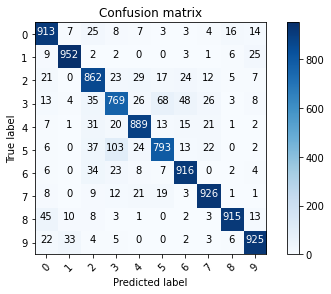

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(K)))

In [14]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

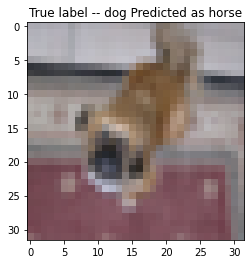

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label -- {labels[y_test[i]]} Predicted as {labels[p_test[i]]}')
plt.show()

In [16]:
# Model summary
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        1849